In [2]:
from bs4 import BeautifulSoup
import requests
import time
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException, StaleElementReferenceException, TimeoutException

In [12]:
options = webdriver.ChromeOptions()
options.add_argument('--ignore-certificate-errors')
driver = webdriver.Chrome(options = options)

In [4]:
result_list = []
for i in range(1, 101):
    try:
        driver.get("https://auto.ru/moskva/cars/all/?page={}".format(i))
        cars = driver.find_elements(By.CLASS_NAME, "ListingItem")
        links_to_cars = []
        for i in range(len(cars)):
            link_to_car = cars[i].find_element(By.CLASS_NAME, "ListingItem__main").find_element(By.CLASS_NAME, "ListingItem__thumb").find_element(By.TAG_NAME, "a").get_attribute("href")
            links_to_cars.append(link_to_car)
        for link in links_to_cars:
            try:
                driver.get(link)
                current_line_in_data_set = []
                car_price = driver.find_element(By.CLASS_NAME, "OfferPriceCaption__price").text
                current_line_in_data_set.append("".join(c for c in car_price if c.isdecimal()))
                list_specifications = driver.find_element(By.XPATH, "//*[@id=\"app\"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul")
                specifications = list_specifications.find_elements(By.TAG_NAME, "li")
                try:
                    for spec in specifications:
                        elements = spec.find_elements(By.TAG_NAME, "span")
                        first_element = elements[0]
                        second_element = elements[1]
                        if first_element.text == "год выпуска":
                            year = second_element.find_element(By.TAG_NAME, "a").text
                            current_line_in_data_set.append("".join(c for c in year if c.isdecimal()))
                        elif first_element.text == "Пробег":
                            mileage = second_element.text
                            current_line_in_data_set.append("".join(c for c in mileage if c.isdecimal()))
                        elif first_element.text == "Кузов":
                            current_line_in_data_set.append(second_element.find_element(By.TAG_NAME, "a").text)
                        elif first_element.text == "Цвет":
                            current_line_in_data_set.append(second_element.find_element(By.TAG_NAME, "a").text)
                        elif first_element.text == "Двигатель":
                            current_line_in_data_set.append(second_element.find_element(By.TAG_NAME, "a").text)
                        elif first_element.text == "Комплектация":
                            current_line_in_data_set.append(second_element.find_element(By.TAG_NAME, "span").text)
                        elif first_element.text == "Коробка":
                            current_line_in_data_set.append(second_element.text)
                        elif first_element.text == "Привод":
                            current_line_in_data_set.append(second_element.text)
                        elif first_element.text == "Руль":
                            current_line_in_data_set.append(second_element.text)
                        elif first_element.text == "ПТС":
                            current_line_in_data_set.append(second_element.text)
                        elif first_element.text == "Таможня":
                            if second_element.text == "Растаможен":
                                current_line_in_data_set.append(1)
                            else:
                                current_line_in_data_set.append(0)
                    result_list.append(current_line_in_data_set)
                    print(len(result_list))
                except NoSuchElementException:
                    current_line_in_data_set.append(None)
            except Exception as e:
                print(e.msg)
    except Exception as e:
        print(e.msg)

1
2
3
4
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
5
6
7
8
9
10
11
12
13
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
14
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
15
16
17
no such element: Unable to locate element: {"method":"css selector","selector":".OfferPriceCaption__price"}
  (Session info: chrome=100.0.4896.127)
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
no such element: Unable to locate element: {"method":"css selector","selector":".OfferPriceCaption__price"}
  (Session info: chrome=100.0.4896.127)
35
36
37
38
39
no such element: Unable

199
no such element: Unable to locate element: {"method":"css selector","selector":".OfferPriceCaption__price"}
  (Session info: chrome=100.0.4896.127)
200
201
202
203
204
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
205
206
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
207
208
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=

no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
320
321
322
323
324
325
326
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
no such element: Unable to locate element: {"method":"css selector","selector":".OfferPriceCaption__price"}
  (Session info: chrome=100.0.4896.127)
327
328
329
330
331
332
333
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
334
335
336
no such element: Una

461
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
462
463
464
465
466
467
no such element: Unable to locate element: {"method":"css selector","selector":".OfferPriceCaption__price"}
  (Session info: chrome=100.0.4896.127)
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
468
469
470
471
472
no such element: Unable to locate elemen

608
609
610
611
612
613
614
615
616
617
618
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
619
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
620
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
621
622
623
624
625
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
626
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Sessio

785
786
787
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
788
789
790
791
792
793
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
794
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
795
796
797
798
799
800
801
802
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session in

934
935
936
937
938
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
939
940
941
942
943
944
945
946
947
948
949
950
951
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
952
953
954
955
956
957
958
959
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
960
961
962
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
963
964
965
966
967
968
969
970
971
972
973
974
975
976
no such element: Unable to locate element: {"method":"css select

no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
1083
1084
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
1085
no such element: Unable to locate element: {"method":"css selector","selector":".OfferPriceCaption__price"}
  (Session info: chrome=100.0.4896.127)
1086
1087
1088
1089
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
1090
1091
no such element: Unable to locate element: 

1228
1229
1230
1231
1232
1233
1234
1235
1236
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
1237
1238
1239
no such element: Unable to locate element: {"method":"css selector","selector":".OfferPriceCaption__price"}
  (Session info: chrome=100.0.4896.127)
1240
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
1241
1242
1243
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
1244
1245
1246
1247
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.

1411
1412
1413
1414
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
1415
1416
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
1417
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
1418
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
1419
1420
1421
1422
1423
1424
1425
1426
1427
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}


no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
1587
1588
1589
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
1590
1591
1592
1593
1594
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
1595
1596
1597
1598
1599
no such element: Unable to locate element: {"method":"css selector","selector":".OfferPriceCaption__price"}
  (Session info: chrome=100.0.4896.127)
1600
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
1601
no such eleme

no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
1744
1745
1746
1747
1748
1749
1750
1751
1752
1753
1754
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
1755
1756
1757
1758
1759
1760
1761
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
1762
1763
1764
1765
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
1766
1767
1768
1769
1770
1771
1772
1773
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"

In [8]:
for i in range(1, 101):
    try:
        driver.get("https://auto.ru/sankt-peterburg/cars/all/?page={}".format(i))
        cars = driver.find_elements(By.CLASS_NAME, "ListingItem")
        links_to_cars = []
        for i in range(len(cars)):
            link_to_car = cars[i].find_element(By.CLASS_NAME, "ListingItem__main").find_element(By.CLASS_NAME, "ListingItem__thumb").find_element(By.TAG_NAME, "a").get_attribute("href")
            links_to_cars.append(link_to_car)
        for link in links_to_cars:
            try:
                driver.get(link)
                current_line_in_data_set = []
                car_price = driver.find_element(By.CLASS_NAME, "OfferPriceCaption__price").text
                current_line_in_data_set.append("".join(c for c in car_price if c.isdecimal()))
                list_specifications = driver.find_element(By.XPATH, "//*[@id=\"app\"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul")
                specifications = list_specifications.find_elements(By.TAG_NAME, "li")
                try:
                    for spec in specifications:
                        elements = spec.find_elements(By.TAG_NAME, "span")
                        first_element = elements[0]
                        second_element = elements[1]
                        if first_element.text == "год выпуска":
                            year = second_element.find_element(By.TAG_NAME, "a").text
                            current_line_in_data_set.append("".join(c for c in year if c.isdecimal()))
                        elif first_element.text == "Пробег":
                            mileage = second_element.text
                            current_line_in_data_set.append("".join(c for c in mileage if c.isdecimal()))
                        elif first_element.text == "Кузов":
                            current_line_in_data_set.append(second_element.find_element(By.TAG_NAME, "a").text)
                        elif first_element.text == "Цвет":
                            current_line_in_data_set.append(second_element.find_element(By.TAG_NAME, "a").text)
                        elif first_element.text == "Двигатель":
                            current_line_in_data_set.append(second_element.find_element(By.TAG_NAME, "a").text)
                        elif first_element.text == "Комплектация":
                            current_line_in_data_set.append(second_element.find_element(By.TAG_NAME, "span").text)
                        elif first_element.text == "Коробка":
                            current_line_in_data_set.append(second_element.text)
                        elif first_element.text == "Привод":
                            current_line_in_data_set.append(second_element.text)
                        elif first_element.text == "Руль":
                            current_line_in_data_set.append(second_element.text)
                        elif first_element.text == "ПТС":
                            current_line_in_data_set.append(second_element.text)
                        elif first_element.text == "Таможня":
                            if second_element.text == "Растаможен":
                                current_line_in_data_set.append(1)
                            else:
                                current_line_in_data_set.append(0)
                    result_list.append(current_line_in_data_set)
                    print(len(result_list))
                except NoSuchElementException:
                    current_line_in_data_set.append(None)
            except Exception as e:
                print(e.msg)
    except Exception as e:
        print(e.msg)

no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
1776
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
1777
1778
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
no such element: Unable to loc

no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
1833
1834
1835
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
1836
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
1837
1838
1839
1840
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
1841


1907
1908
1909
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
1910
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
1911
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
1912
1913
1914
1915
1916
1917
1918
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=1

2000
2001
2002
2003
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
2004
2005
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
2006
2007
no su

2070
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
2071
2072
2073
2074
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
2075
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
2076
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
2077
no su

no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
2156
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
2157
2158
2159
2160
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
2161
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
2162
2163
2164
2165
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.

no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
2264
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
2265
2266
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
2267
2268
2269
2270
2271
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
2272


2347
2348
2349
2350
2351
2352
no such element: Unable to locate element: {"method":"css selector","selector":".OfferPriceCaption__price"}
  (Session info: chrome=100.0.4896.127)
2353
2354
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
2355
2356
2357
2358
2359
2360
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
2361
2362
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
2363
no 

2452
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
2453
2454
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
2455
2456
2457
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
no such element

2529
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
2530
2531
2532
2533
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
2534
2535
2536
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
2537
2538
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.

no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
2601
2602
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
2603
2604
2605
2606
2607
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
2608
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
2609
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)


no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
2681
2682
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
2683
2684
2685
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
2686
2687
2688
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
2689


2763
2764
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
2765
2766
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
2767
2768
2769
2770
2771
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)


no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
2837
2838
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
2839
no such element: Unable to loc

no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
2913
2914
2915
2916
2917
2918
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
2919
2920
2921
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
2922
2923
2924
2925
2926
2927
2928
2929
2930
2931
2932
2933
2934
2935
2936
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]

3000
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
3001
no such element: Unable to locate element: {"method":"css selector","selector":".OfferPriceCaption__price"}
  (Session info: chrome=100.0.4896.127)
3002
3003
3004
3005
3006
3007
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
3008
3009
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
3010
no such element: Unable to locate

3067
3068
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
3069
3070
3071
3072
3073
3074
3075
3076
3077
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
3078
3079
3080
no such element: Unable to locate element: {"method":"css selector","selector":".OfferPriceCaption__price"}
  (Session info: chrome=100.0.4896.127)
3081
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
3082
3083
308

no such element: Unable to locate element: {"method":"css selector","selector":".OfferPriceCaption__price"}
  (Session info: chrome=100.0.4896.127)
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
3151
3152
3153
3154
3155
3156
3157
3158
3159
3160
3161
3162
3163
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
3164
3165
3166
3167
316

no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
3260
3261
3262
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
3263
3264
3265
3266
3267
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
3268


no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
3356
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
3357
3358
3359
3360
no such element: Una

3435
3436
3437
3438
3439
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
3440
3441
3442
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
no such element: Unable to locate element: {"method":"css selector","selector":".OfferPriceCaption__price"}
  (Session info: chrome=100.0.4896.127)
3443
3444
3445
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
3446
no such element: Unable to l

no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
3524
3525
3526
3527
3528
3529
3530
3531
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
3532
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
3533
3534
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.

3605
3606
3607
3608
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
3609
3610
3611
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
3612
3613
3614
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
3615
3616
3617
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chr

3673
3674
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
3675
3676
3677
3678
3679
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
3680
3681
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)


3748
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
3749
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
3750
3751
3752
3753
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
3754
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
3755
no su

3819
3820
3821
3822
3823
3824
3825
3826
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
3827
3828
3829
3830
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
3831
3832
3833
3834
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Se

3889
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
3890
3891
3892
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
3893
3894
3895
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
3896
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
3897


no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
3970
3971
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
3972
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
3973
3974
no such element: Una

no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
4052
4053
4054
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
4055
4056
4057
4058
4059
4060
4061
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
4062
4063
4064
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chr

4121
4122
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
4123
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
4124
4125
4126
4127
4128
4129
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
4130
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
4131
4132
4133
4134
4135
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session

no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
4182
4183
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
4184
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
no such element: Unable to loc

In [11]:
for i in range(1, 101):
    try:
        driver.get("https://auto.ru/moskovskaya_oblast/cars/all/?page={}".format(i))
        cars = driver.find_elements(By.CLASS_NAME, "ListingItem")
        links_to_cars = []
        for i in range(len(cars)):
            link_to_car = cars[i].find_element(By.CLASS_NAME, "ListingItem__main").find_element(By.CLASS_NAME, "ListingItem__thumb").find_element(By.TAG_NAME, "a").get_attribute("href")
            links_to_cars.append(link_to_car)
        for link in links_to_cars:
            try:
                driver.get(link)
                current_line_in_data_set = []
                car_price = driver.find_element(By.CLASS_NAME, "OfferPriceCaption__price").text
                current_line_in_data_set.append("".join(c for c in car_price if c.isdecimal()))
                list_specifications = driver.find_element(By.XPATH, "//*[@id=\"app\"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul")
                specifications = list_specifications.find_elements(By.TAG_NAME, "li")
                try:
                    for spec in specifications:
                        elements = spec.find_elements(By.TAG_NAME, "span")
                        first_element = elements[0]
                        second_element = elements[1]
                        if first_element.text == "год выпуска":
                            year = second_element.find_element(By.TAG_NAME, "a").text
                            current_line_in_data_set.append("".join(c for c in year if c.isdecimal()))
                        elif first_element.text == "Пробег":
                            mileage = second_element.text
                            current_line_in_data_set.append("".join(c for c in mileage if c.isdecimal()))
                        elif first_element.text == "Кузов":
                            current_line_in_data_set.append(second_element.find_element(By.TAG_NAME, "a").text)
                        elif first_element.text == "Цвет":
                            current_line_in_data_set.append(second_element.find_element(By.TAG_NAME, "a").text)
                        elif first_element.text == "Двигатель":
                            current_line_in_data_set.append(second_element.find_element(By.TAG_NAME, "a").text)
                        elif first_element.text == "Комплектация":
                            current_line_in_data_set.append(second_element.find_element(By.TAG_NAME, "span").text)
                        elif first_element.text == "Коробка":
                            current_line_in_data_set.append(second_element.text)
                        elif first_element.text == "Привод":
                            current_line_in_data_set.append(second_element.text)
                        elif first_element.text == "Руль":
                            current_line_in_data_set.append(second_element.text)
                        elif first_element.text == "ПТС":
                            current_line_in_data_set.append(second_element.text)
                        elif first_element.text == "Таможня":
                            if second_element.text == "Растаможен":
                                current_line_in_data_set.append(1)
                            else:
                                current_line_in_data_set.append(0)
                    result_list.append(current_line_in_data_set)
                    print(len(result_list))
                except NoSuchElementException:
                    current_line_in_data_set.append(None)
            except Exception as e:
                print(e.msg)
    except Exception as e:
        print(e.msg)

4252
4253
4254
4255
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
4256
4257
4258
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
4259
4260
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
4261
4262
4263
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=1

4355
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
4356
4357
4358
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
4359
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
4360
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
4361
4362
4363
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)


no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
4441
4442
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
4443
4444
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
4445
4446
4447
4448
4449
4450
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
4451
4452
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=1

4554
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
4555
no such element: Unable to locate element: {"method":"css selector","selector":".OfferPriceCaption__price"}
  (Session info: chrome=100.0.4896.127)
4556
4557
4558
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
4559
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
4560
4561
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
no such element: Unable to locate element: {"met

no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
4685
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
4686
4687
4688
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
4689
4690
4691
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
4692
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
4693


no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
4785
4786
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
4787
4788
4789
4790
4791
4792
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
4793
4794
4795
4796
4797
4798
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info

  (Session info: chrome=100.0.4896.127)
no such window: window was already closed
  (Session info: chrome=100.0.4896.127)
no such window: window was already closed
  (Session info: chrome=100.0.4896.127)
no such window: window was already closed
  (Session info: chrome=100.0.4896.127)
no such window: window was already closed
  (Session info: chrome=100.0.4896.127)
no such window: window was already closed
  (Session info: chrome=100.0.4896.127)
no such window: window was already closed
  (Session info: chrome=100.0.4896.127)
no such window: window was already closed
  (Session info: chrome=100.0.4896.127)
no such window: window was already closed
  (Session info: chrome=100.0.4896.127)
no such window: window was already closed
  (Session info: chrome=100.0.4896.127)
no such window: window was already closed
  (Session info: chrome=100.0.4896.127)
no such window: window was already closed
  (Session info: chrome=100.0.4896.127)
no such window: window was already closed
  (Session info:

In [13]:
for i in range(1, 101):
    try:
        driver.get("https://auto.ru/velikiy_novgorod/cars/all/?page={}".format(i))
        cars = driver.find_elements(By.CLASS_NAME, "ListingItem")
        links_to_cars = []
        for i in range(len(cars)):
            link_to_car = cars[i].find_element(By.CLASS_NAME, "ListingItem__main").find_element(By.CLASS_NAME, "ListingItem__thumb").find_element(By.TAG_NAME, "a").get_attribute("href")
            links_to_cars.append(link_to_car)
        for link in links_to_cars:
            try:
                driver.get(link)
                current_line_in_data_set = []
                car_price = driver.find_element(By.CLASS_NAME, "OfferPriceCaption__price").text
                current_line_in_data_set.append("".join(c for c in car_price if c.isdecimal()))
                list_specifications = driver.find_element(By.XPATH, "//*[@id=\"app\"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul")
                specifications = list_specifications.find_elements(By.TAG_NAME, "li")
                try:
                    for spec in specifications:
                        elements = spec.find_elements(By.TAG_NAME, "span")
                        first_element = elements[0]
                        second_element = elements[1]
                        if first_element.text == "год выпуска":
                            year = second_element.find_element(By.TAG_NAME, "a").text
                            current_line_in_data_set.append("".join(c for c in year if c.isdecimal()))
                        elif first_element.text == "Пробег":
                            mileage = second_element.text
                            current_line_in_data_set.append("".join(c for c in mileage if c.isdecimal()))
                        elif first_element.text == "Кузов":
                            current_line_in_data_set.append(second_element.find_element(By.TAG_NAME, "a").text)
                        elif first_element.text == "Цвет":
                            current_line_in_data_set.append(second_element.find_element(By.TAG_NAME, "a").text)
                        elif first_element.text == "Двигатель":
                            current_line_in_data_set.append(second_element.find_element(By.TAG_NAME, "a").text)
                        elif first_element.text == "Комплектация":
                            current_line_in_data_set.append(second_element.find_element(By.TAG_NAME, "span").text)
                        elif first_element.text == "Коробка":
                            current_line_in_data_set.append(second_element.text)
                        elif first_element.text == "Привод":
                            current_line_in_data_set.append(second_element.text)
                        elif first_element.text == "Руль":
                            current_line_in_data_set.append(second_element.text)
                        elif first_element.text == "ПТС":
                            current_line_in_data_set.append(second_element.text)
                        elif first_element.text == "Таможня":
                            if second_element.text == "Растаможен":
                                current_line_in_data_set.append(1)
                            else:
                                current_line_in_data_set.append(0)
                    result_list.append(current_line_in_data_set)
                    print(len(result_list))
                except NoSuchElementException:
                    current_line_in_data_set.append(None)
            except Exception as e:
                print(e.msg)
    except Exception as e:
        print(e.msg)

4912
4913
4914
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
4915
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
4916
4917
4918
4919
4920
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
4921
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
4922
4923
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=1

5005
5006
5007
5008
5009
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
5010
5011
5012
5013
5014
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
5015
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
5016
5017
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
5018
5019
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session

5067
5068
5069
5070
5071
5072
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
5073
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
5074
5075
5076
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.

5163
5164
5165
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
5166
5167
5168
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
5169
no such el

no such element: Unable to locate element: {"method":"css selector","selector":".OfferPriceCaption__price"}
  (Session info: chrome=100.0.4896.127)
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
5260
5261
5262
5263
5264
5265
5266
5267
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
5268
5269
5270
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome

no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
5338
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
5339
5340
5341
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="app"]/div/div[2]/div[3]/div/div[2]/div/div[2]/div/div[6]/div[1]/ul"}
  (Session info: chrome=100.0.4896.127)
5342
5343
5344
no such el

no such window: window was already closed
  (Session info: chrome=100.0.4896.127)
no such window: window was already closed
  (Session info: chrome=100.0.4896.127)
no such window: window was already closed
  (Session info: chrome=100.0.4896.127)
no such window: window was already closed
  (Session info: chrome=100.0.4896.127)
no such window: window was already closed
  (Session info: chrome=100.0.4896.127)


In [21]:
len(result_list)
result_list[0]

['5900000',
 '2021',
 '11500',
 'внедорожник 5 дв.',
 'чёрный',
 'Бензин',
 'Sport 45 TFSI quattro S tronic',
 'роботизированная',
 'полный',
 'Левый',
 'Оригинал',
 1]

In [22]:
column = ['Цена', 'Год выпуска', 'Пробег', 'Кузов', 'Цвет', 'Двигатель', 'Комплектация', 'Коробка', 'Привод', 'Руль', 'ПТС', 'Таможня']
df = pd.DataFrame(result_list, columns = column)

In [23]:
df.head()

,Цена,Год выпуска,Пробег,Кузов,Цвет,Двигатель,Комплектация,Коробка,Привод,Руль,ПТС,Таможня
0,5900000,2021,11500,внедорожник 5 дв.,чёрный,Бензин,Sport 45 TFSI quattro S tronic,роботизированная,полный,Левый,Оригинал,1.0
1,13950000,2021,30000,внедорожник 5 дв.,синий,Дизель,xDrive40d,автоматическая,полный,Левый,Оригинал,1.0
2,940000,2012,153000,внедорожник 5 дв.,белый,Бензин,49 опций,автоматическая,полный,Левый,Оригинал,1.0
3,500000,1998,200000,купе,белый,Бензин,механическая,задний,Правый,Дубликат,1,NaN
4,995000,2012,138271,внедорожник 5 дв.,чёрный,Бензин,57 опций,вариатор,полный,Левый,Оригинал,1.0


In [26]:
df = df.loc[df['Комплектация'] != 'механическая']

In [28]:
df.shape

(5197, 12)

In [29]:
df = df.loc[df['Комплектация'] != 'автоматическая']

In [30]:
df.shape

(5025, 12)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5025 entries, 0 to 5359
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Цена          5025 non-null   object 
 1   Год выпуска   5025 non-null   object 
 2   Пробег        5025 non-null   object 
 3   Кузов         5025 non-null   object 
 4   Цвет          5025 non-null   object 
 5   Двигатель     5025 non-null   object 
 6   Комплектация  5025 non-null   object 
 7   Коробка       5025 non-null   object 
 8   Привод        5025 non-null   object 
 9   Руль          5025 non-null   object 
 10  ПТС           5025 non-null   object 
 11  Таможня       4986 non-null   float64
dtypes: float64(1), object(11)
memory usage: 510.4+ KB


In [32]:
df = df.drop('Таможня', 1)

In [52]:
df.info()
df = df.convert_dtypes()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5025 entries, 0 to 5359
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Цена          5025 non-null   int64 
 1   Год выпуска   5025 non-null   object
 2   Пробег        5025 non-null   object
 3   Кузов         5025 non-null   object
 4   Цвет          5025 non-null   object
 5   Двигатель     5025 non-null   object
 6   Комплектация  5025 non-null   object
 7   Коробка       5025 non-null   object
 8   Привод        5025 non-null   object
 9   Руль          5025 non-null   object
 10  ПТС           5025 non-null   object
dtypes: int64(1), object(10)
memory usage: 471.1+ KB


In [36]:
import seaborn as sns

In [74]:
df[df['Цена'] > 2000000]['Цена']

0        5900000
1       13950000
7        3500000
8        3700000
9        5500000
          ...   
5288     2800000
5294     2800000
5311     4650000
5330     4650000
5356    13900000
Name: Цена, Length: 1421, dtype: Int64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


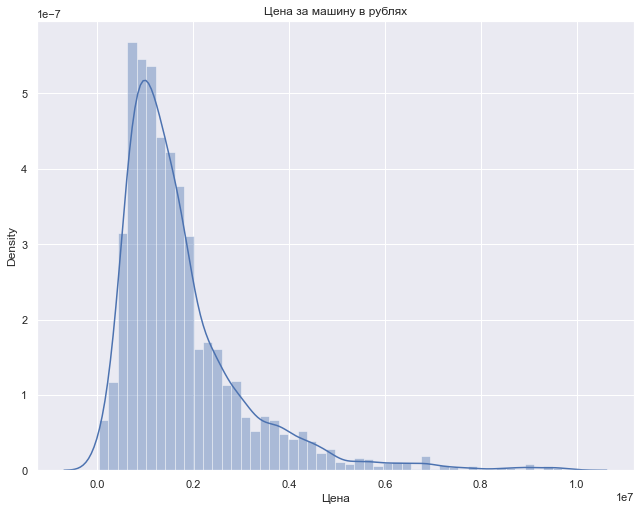

In [114]:
sns.set(rc={'figure.figsize':(10.7,8.27)})
distplot = sns.distplot(df[df['Цена'] < 10000000]['Цена']).set_title('Цена за машину в рублях')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Распределение количества автомобилей с разными типами двигателей')

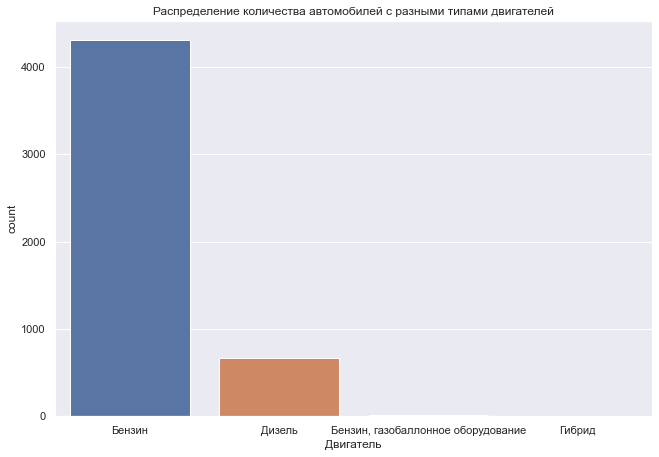

In [117]:
sns.set(rc={'figure.figsize':(10.7,7.27)})
sns.countplot(df['Двигатель']).set_title("Распределение количества автомобилей с разными типами двигателей")

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Распределение автомобилей по пробегу')

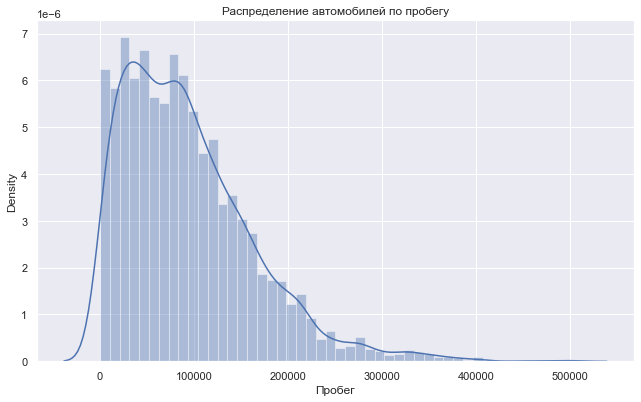

In [118]:
df['Пробег'] = pd.to_numeric(df['Пробег'])
sns.set(rc={'figure.figsize':(10.7,6.27)})
sns.distplot(df[df['Пробег']> 0]['Пробег']).set_title("Распределение автомобилей по пробегу")

In [92]:
df = df[df['Коробка'] != 'передний']
df = df[df['Коробка'] != 'полный']

In [93]:
df.shape

(4986, 11)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Распределение количества автомобилей с разными типами коробок передачи')

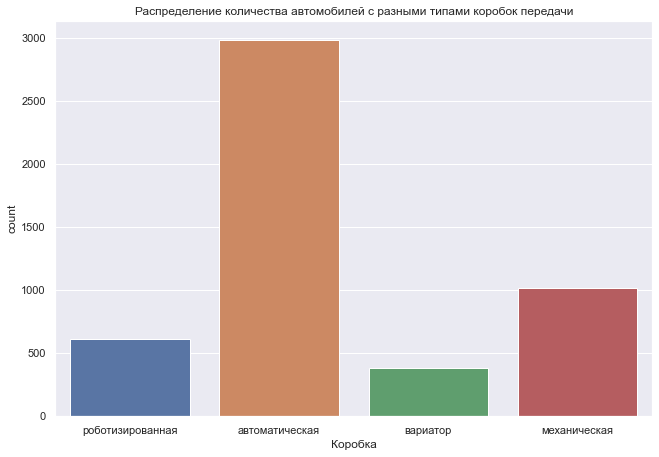

In [120]:
sns.set(rc={'figure.figsize':(10.7,7.27)})
sns.countplot(df['Коробка']).set_title("Распределение количества автомобилей с разными типами коробок передачи")

In [98]:
df['Год выпуска'] = pd.to_numeric(df['Год выпуска'])

2018    621
2020    539
2019    538
2017    534
2021    515
2016    331
2015    329
2013    315
2012    304
2014    271
2011    178
2008    113
2010    106
2007     94
2009     55
2006     31
2022     25
2004     13
2003     12
2005     12
1994      7
2000      7
2002      7
2001      6
1998      5
1997      4
1999      4
1992      3
1993      2
1995      2
1982      1
1991      1
1986      1
Name: Год выпуска, dtype: int64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Распределение автомобилей по году выпуска')

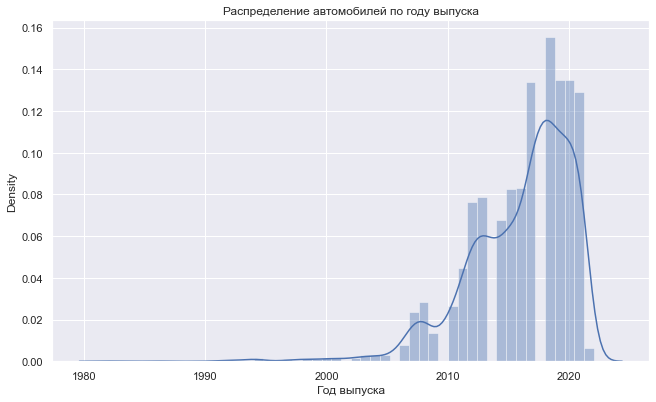

In [122]:
sns.set(rc={'figure.figsize':(10.7,6.27)})
sns.distplot(df[df['Год выпуска']> 0]['Год выпуска']).set_title("Распределение автомобилей по году выпуска")

In [100]:
from matplotlib import pyplot as plt

Text(0, 0.5, 'Цена на автомобиль')

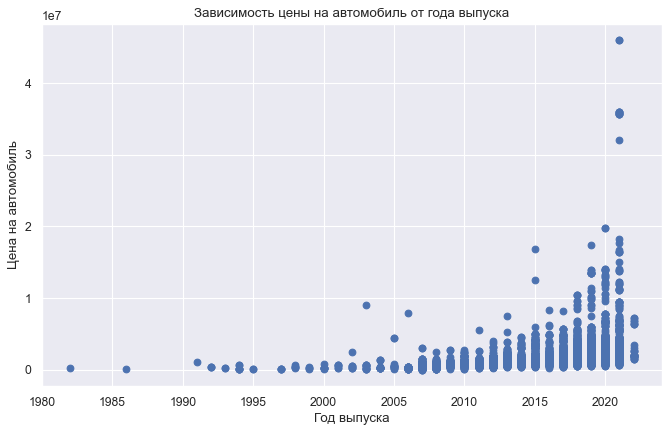

In [124]:
from matplotlib.pyplot import figure
figure(figsize=(10, 6), dpi=80)
plt.scatter(x='Год выпуска', y = 'Цена', data = df)
plt.title('Зависимость цены на автомобиль от года выпуска')
plt.xlabel('Год выпуска')
plt.ylabel('Цена на автомобиль')

Text(0, 0.5, 'Цена на автомобиль')

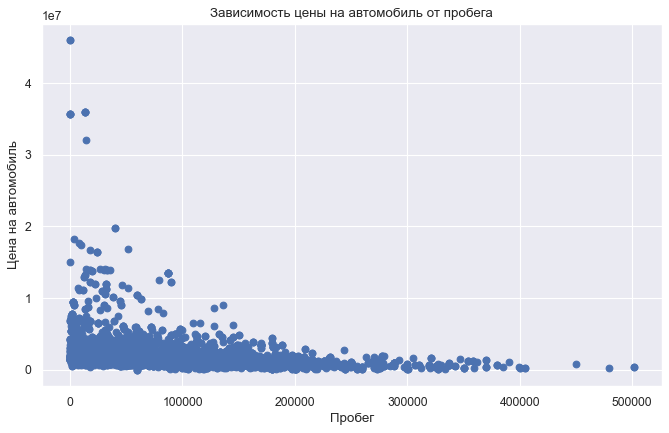

In [125]:
figure(figsize=(10, 6), dpi=80)
plt.scatter(x='Пробег', y = 'Цена', data = df)
plt.title('Зависимость цены на автомобиль от пробега')
plt.xlabel('Пробег')
plt.ylabel('Цена на автомобиль')

Text(0.5, 1.0, 'Зависимость цены на автомобиль от типа двигателя')

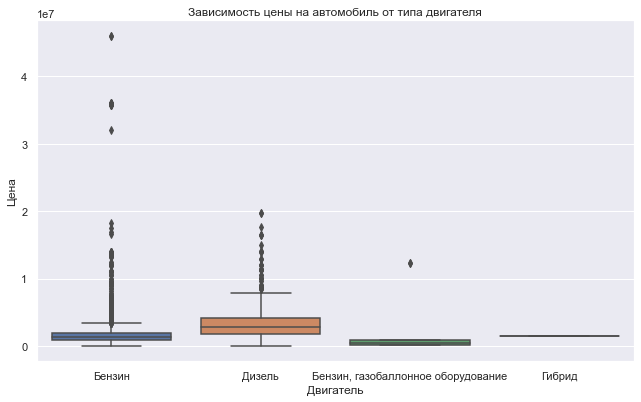

In [128]:
sns.set(rc={'figure.figsize':(10.7,6.27)})
sns.boxplot(x = 'Двигатель', y = 'Цена', data = df).set_title("Зависимость цены на автомобиль от типа двигателя")

Text(0.5, 1.0, 'Зависимость цены автомобиля от вида коробки передач')

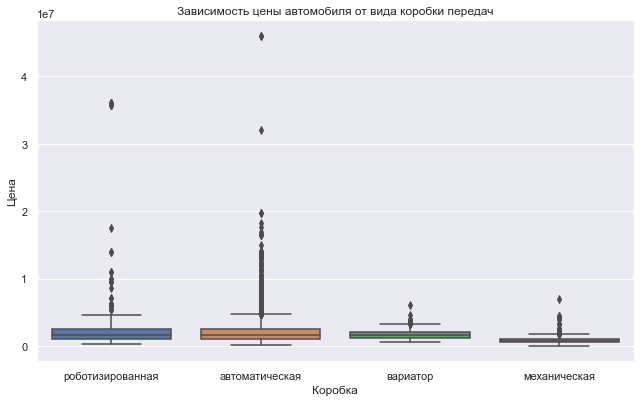

In [129]:
sns.set(rc={'figure.figsize':(10.7,6.27)})
sns.boxplot(x = 'Коробка', y = 'Цена', data = df).set_title("Зависимость цены автомобиля от вида коробки передач")